In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit as fit
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (12,8)
path = '/home/qsim-rad/LabRAD/Data/MLpiezoscan.dir/'

Populating the interactive namespace from numpy and matplotlib


In [2]:
scan1 = np.loadtxt(path + '00074 - MLpiezoscan.csv', delimiter=',')
scan2 = np.loadtxt(path + '00075 - MLpiezoscan.csv', delimiter=',')

In [34]:
deltaScan = 0.3
deltaGenerator = 43.73 - 11.72
c = 299792458
lamb = c/(811.291531e12)
deltaT = lamb/(2*c)
convert = deltaGenerator/deltaScan
convertVtoT = deltaT/(2*np.pi*8.3283)

volts1 = convert*scan1[:,0]
volts2 = convert*scan2[:,0]
counts1 = scan1[:,1]
counts2 = scan2[:,1]
counts_avg = (counts1 + counts2)/2.0

def sine_fit(V, Amp, omeg, phi, offset):
    return Amp*np.sin(omeg*V + phi) + offset

func, pcov = fit(sine_fit, volts1, counts_avg)
print func[2], deltaT


8.32836314536 6.16301268896e-16


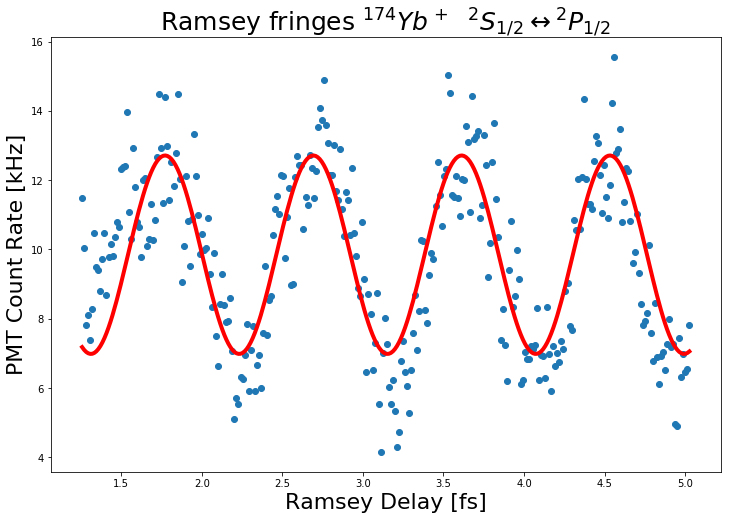

In [48]:
plt.scatter(10e15*convertVtoT*volts1, counts_avg)
plt.plot(10e15*convertVtoT*volts1, sine_fit(volts1, func[0], func[1], func[2], func[3]),'r', lw = 4 )
plt.xlabel('Ramsey Delay [fs]', fontsize = 22)
plt.ylabel('PMT Count Rate [kHz]', fontsize = 22)
plt.title('Ramsey fringes $^{174}Yb^+$  $^2S_{1/2}\leftrightarrow ^2P_{1/2}$', fontsize = 25)